<h1>PCA for a set of images</h1>

<h2>Required libraries</h2>

In [10]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

<h2>Sign language dataset</h2>

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Algebra_lineal-para-ML/main/Datos/sign-language-mnist/sign_mnist_test.csv')
print(data.shape)
data.head()

(7172, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [21]:
sample = np.random.choice(data.columns[1:], 10)
data.loc[:,sample].describe()

,pixel327,pixel564,pixel10,pixel575,pixel752,pixel543,pixel734,pixel81,pixel573,pixel280
count,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000,7172.000000
mean,144.124651,175.417736,167.311350,148.071389,164.434049,153.623954,155.256553,173.411043,147.000418,180.325572
std,48.848119,45.347193,32.361682,52.546344,63.092645,48.625286,53.918060,29.333403,50.739123,34.255113
min,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,107.000000,150.000000,149.000000,108.000000,130.000000,120.000000,114.000000,158.000000,110.000000,165.000000
50%,148.000000,184.000000,170.000000,150.000000,185.000000,156.000000,159.000000,174.000000,148.000000,182.000000
75%,182.000000,208.000000,188.000000,188.000000,209.000000,188.000000,198.250000,192.000000,184.000000,201.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [22]:
y = data['label'].values
print(y.shape)
y

(7172,)


array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [23]:
X = data.iloc[:,1:].values
X.shape

(7172, 784)

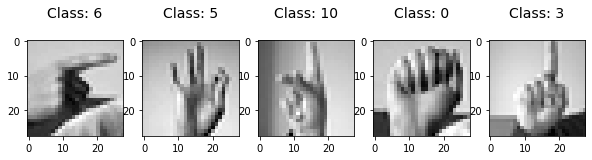

In [24]:
plt.figure(figsize=(10,2))
for index, (imagen, clase) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(imagen, (28,28)), cmap=plt.cm.gray)
    plt.title('Class: %i\n' % clase, fontsize = 14)

In [25]:
pca = PCA(.95).fit(X)
X_reduced = pca.transform(X)
X_reduced.shape

(7172, 83)

In [26]:
approximation = pca.inverse_transform(X_reduced)

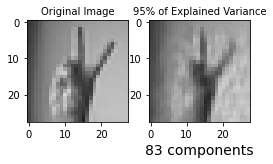

In [28]:
imagen = 721

plt.figure(figsize=(4,2));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[imagen].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.title('Original Image', fontsize = 10);

# 83 principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[imagen].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('83 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 10);